### Problem statment:

With increased number of energy reports from international and business organizations, it is now necessary to have an idea where trends are heading in the energy debate. 

One way to see were trends are is to get the main keywords or the main themes of discussions through processing words from published energy reports. 

### The Goal

produce a wordbacg for each report to define the center of discussion of the document and plot a bar plot of the most frequent words.



In [1]:
#!pip install PyPDF2

In [1]:
text_to_analyze = """

analyze this ext

"""

In [2]:
import os
import pandas as pd
import sys
import re
import time
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords');
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import seaborn as sns




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Required Functions to define


In [3]:
#required functions to define

## get the count of pages
def getPageCount(pdf_file):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pages = pdfReader.numPages
    return pages


## extract data from the pdf 
def extractData(pdf_file, page):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pageObj = pdfReader.getPage(page)
    data = pageObj.extractText()
    return data


## count the words
def getWordCount(data):

    data=data.split()
    return len(data)


#remove special characters
def remove_special(text):
    marks = ['(',')','[',']', '?', '.', ':', ',', '\n', '%']
    for x in text:
        if x in marks:
            text = text.replace(x,"")
    return(text)


In [4]:
# full code 

def doc_to_cloud(doc_location, stem):
    
    """
    The function takes in a pdf file and the preference to use stemmed text or tokenized text 
    
    The return is a word cloud of the desired document
    
    """
        
    numPages = getPageCount(doc_location)
    
    text_total = " "
    for i in range(numPages):
        text = extractData(doc_location, i)
        text_total = text_total+text

    # remove special charachters 
    text_total = remove_special(text_total)
    
    #create a lower case words
    text_total = text_total.lower()
    
    
    #Tokenize 
    text_total = word_tokenize(text_total)
    
    #remove specific terms
    text_total = [e for e in text_total if e not in ('in', 'a', 'is', 'the', 'of', 'to', 'by', 'from', 'will', 
                                                    'and', 'for', 'on', 'at', 'that', 'be', 'are', 'is', 
                                                    'its', 'than', 'this', 'their', 'these', 'as')]
    
    
    # stemming
    stemmed_text = []
    porter = PorterStemmer()
    for x in text_total:
        x = porter.stem(x)
        stemmed_text.append(x)
        
    
    #declare global variable to be used for the word count plot latter
    global text_total_tocloud
    
    #condition to decide if use tokenized text or stemmed text 
    if stem == 1:
        text_total_tocloud = stemmed_text
    else:
        text_total_tocloud = text_total
    
    # join total text in a single sentence
    text_total_tocloud = " ".join(text_total_tocloud)
    
    
    # create a wordCloud
    # visualization of the stemmed sentences

    wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,background_color='white',
                             max_font_size = 100).generate(text_total_tocloud)
    plt.figure(figsize=(15,8))
    plt.axis('off')
    plt.imshow(wordcloud_low)
    plt.tight_layout(pad = 0)
    plt.show()
    

In [5]:
# full code 

##TEXT defined in the workbook

def text_to_cloud(text_obj, stem):
    
    """
    The function takes in a text object and the preference to use stemmed text or tokenized text 
    
    The return is a word cloud of the desired document
    
    """
        
    # remove special charachters 
    text_total = remove_special(text_obj)
    
    #create a lower case words
    text_total = text_total.lower()
    
    
    #Tokenize 
    text_total = word_tokenize(text_total)
    
    #remove specific terms
    text_total = [e for e in text_total if e not in ('in', 'a', 'is', 'the', 'of', 'to', 'by', 'from', 'will', 
                                                    'and', 'for', 'on', 'at', 'that', 'be', 'are', 'is', 
                                                    'its', 'than', 'this', 'their', 'these', 'as')]
    
    
    # stemming
    stemmed_text = []
    porter = PorterStemmer()
    for x in text_total:
        x = porter.stem(x)
        stemmed_text.append(x)
        
    
    #declare global variable to be used for the word count plot latter
    global text_total_tocloud
    
    #condition to decide if use tokenized text or stemmed text 
    if stem == 1:
        text_total_tocloud = stemmed_text
    else:
        text_total_tocloud = text_total
    
    # join total text in a single sentence
    text_total_tocloud = " ".join(text_total_tocloud)
    
    
    # create a wordCloud
    # visualization of the stemmed sentences

    wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,background_color='white',
                             max_font_size = 100).generate(text_total_tocloud)
    plt.figure(figsize=(15,8))
    plt.axis('off')
    plt.imshow(wordcloud_low)
    plt.tight_layout(pad = 0)
    plt.show()

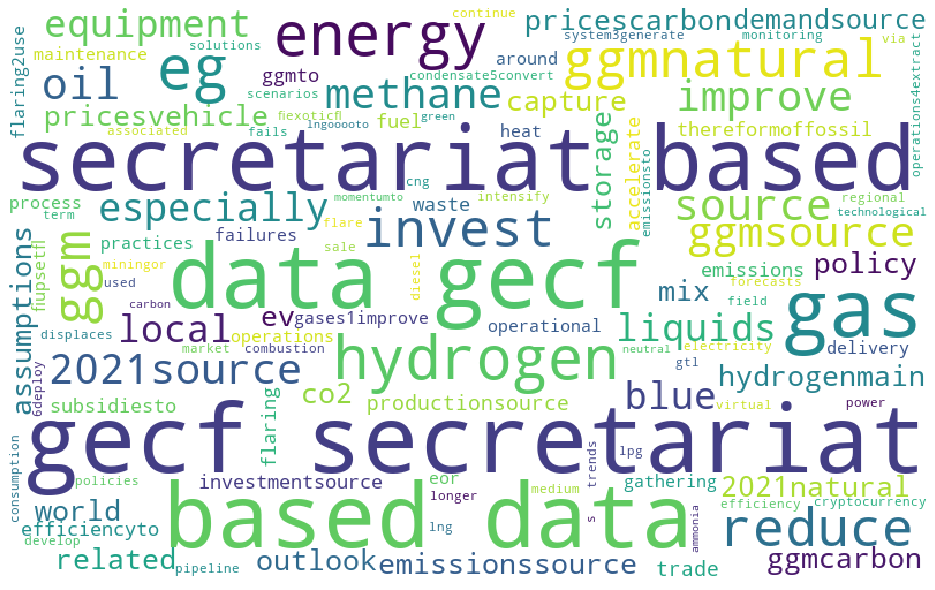

In [7]:
doc_to_cloud(r'C:\Users\M.Amer\Desktop\GECF_Corona\Outlook\Outlook 2021\Alternative scenario 2021.pdf', 0)

In [8]:
text_total_tocloud

"oil pricescarbon pricesvehicle outlook ev hydrogenmain policy assumptions energy-related co2 emissionssource gecf secretariat based data gecf ggmcarbon capture storage world energy mix source gecf secretariat based data gecf ggm 2021source gecf secretariat based data gecf ggm 2021natural gas hydrogen demandsource gecf secretariat based data gecf ggm 2021source gecf secretariat based data gecf ggmnatural gas hydrogen productionsource gecf secretariat based data gecf ggmsource gecf secretariat based data gecf ggmnatural gas hydrogen trade source gecf secretariat based data gecf ggmsource gecf secretariat based data gecf ggmnatural gas investmentsource gecf secretariat based data gecf ggmto accelerate thereformoffossil fuel subsidiesto improve energy efficiencyto reduce methane emissions flaring waste gases1improve operational practices especially around equipment maintenance reduce equipment failures ﬁupsetﬂ flaring2use gas operations eg process heat eor or delivery local gas gathering 

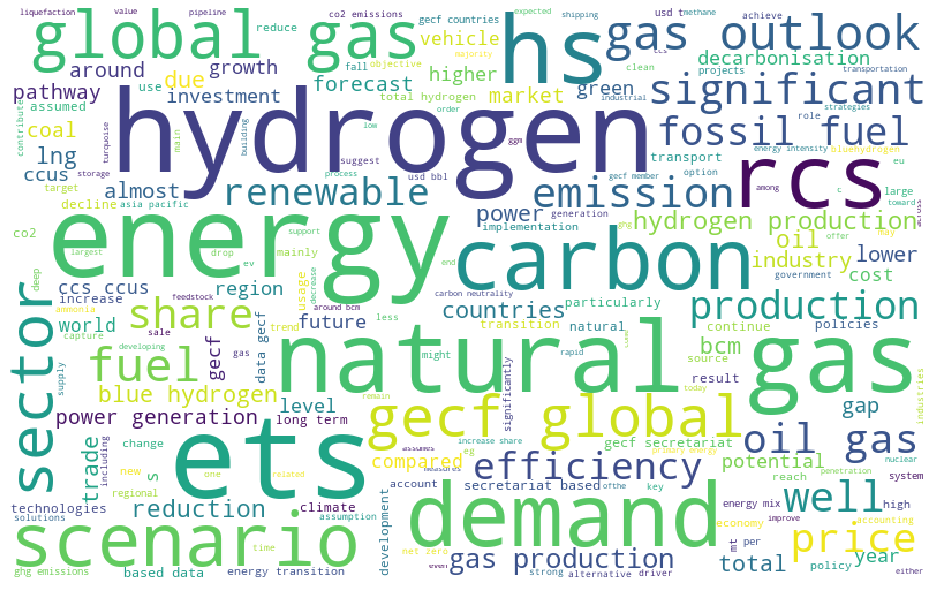

In [9]:
text_to_cloud(ASC_2021, 0)

In [10]:
text_total_tocloud

"241 gecf global gas outlook 20506 alternative scenarioskey findings\U00100078 gecf energy transition scenario ets co2 emissions shrinksignificantly 60 compared reference case scenario rcsreaching around 117 gt co2 although ets trajectory remainsincompatible with 15°c target it consistent with paris agreementobjective achieve 2°c limit end century\U00100078 gecf hydrogen scenario hs 2050 emissions decrease 26 gtco2 implementation aggressive hydrogen development contributes toclosing gap between rcs paris-aligned trajectory\U00100078 ets world primary energy demand starts fall 2025 ending up5 lower 2050 2020 levels\U00100078 ets envisages drop fossil fuel ’ s share 38 2050 natural gaswill remain most resilient fossil fuel with 21 share 2050 demand willbe peaked 2027 4250 bcm however gas usage plateau lateryears decrease slowly 2050\U00100078 hs natural gas production increase more 5200 bcm 2050which almost 400 bcm less what forecast rcs\U00100078 hs demand hydrogen forecast reach more 6

### Count the occurance of each word in the text

In [35]:
# Required functions

# count the words in the stemmed or the tokenied text 
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts


# plot the outcome
def word_count_plot(dataf, plot_title):    
    sns.catplot(
        data=dataf,
        x='word',
        y='word count',
        kind = 'bar',
        height=5, # make the plot 5 units high
        aspect=3); # height should be three times width
    plt.title(plot_title )
    plt.xticks(rotation=90, fontsize= 10)

    plt.show()

In [67]:
# full code 


def plot_of_counts(text, plot_title, number_of_repeats_to_ignore):
    
    #create the word counts dictionary of the analyzed text
    word_count_dic = word_count(text)
    
    # create a dataframe of the dictionary 
    total_text_count = pd.DataFrame.from_dict(word_count_dic, orient ='index')
    
    # reset index of the dataframe
    total_text_count.reset_index(inplace = True)
    
    # rename dataframe columns
    total_text_count.columns = ['word', 'word count']
    
    #remove "in, a, is, the, of, to, by, from"
    #words_to_remove = ['in', 'a', 'is', 'the', 'of', 'to', 'by', 'from', 'will']
    #total_text_count = total_text_count[~total_text_count['word'] not in(words_to_remove)]
    
    
    #choose only words that are repeated more than x times
    total_text_count_x = total_text_count[total_text_count['word count']>number_of_repeats_to_ignore]
    
    # sort values
    total_text_count_x = total_text_count_x.sort_values('word count',  ascending=False)
    
    #plot the outcome
    word_count_plot(total_text_count_x, plot_title) 


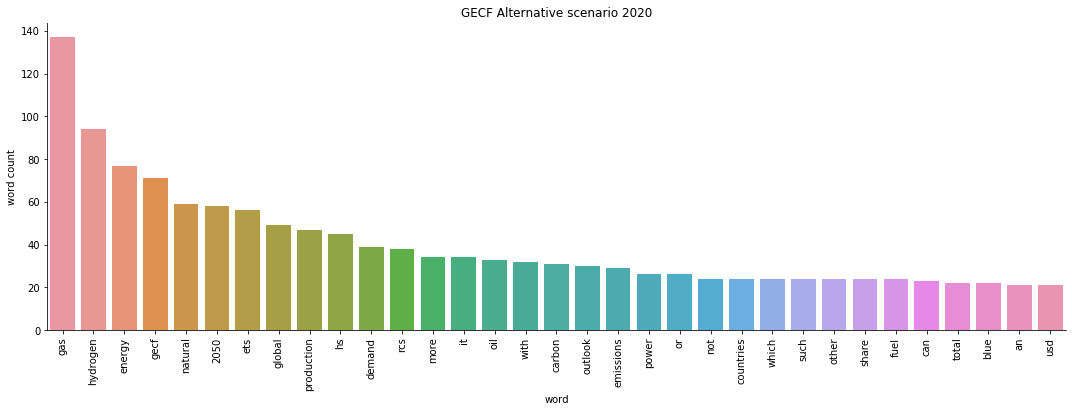

In [69]:
plot_of_counts(text_total_tocloud, 'GECF Alternative scenario 2021', 20)